In [ ]:
# Importing the required Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Reading dataset from .csv file

dataset = pd.read_csv('sample_data/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


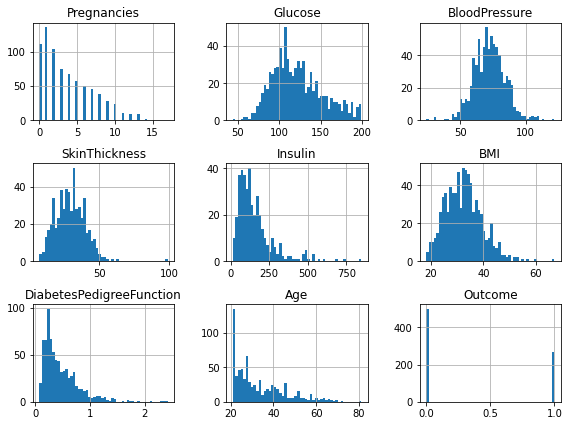

In [ ]:
# Replacing the missing or null entries in dataset by np.Nan

# Plotting the histograms of various parameters (columns) in dataset

col_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for c in col_missing:
    dataset[c] = dataset[c].replace(to_replace=0, value=np.NaN)
dataset.hist(bins=50, figsize = (8.0, 6.0))
plt.tight_layout(True)
plt.show()

In [ ]:
# Splitting the X and y in test and train sets. Train will be used to fit in the model for doing the 
# predictions on the test set

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
# Splitting the X and y in test and train sets. Train will be used to fit in the model for doing the 
# predictions on the test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# SimpleImputer is used to handle the np.NaN values
# Replacing the missing values with median

from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values = np.NaN, strategy='median')
X_train = impute.fit_transform(X_train)
X_test = impute.fit_transform(X_test)

In [ ]:
# StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Applying stochastic gradient descent classifier on the X_train and y_train

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'modified_huber', shuffle = True) #shuffle is true to shuffle the training data after each epoch. #‘modified_huber’ loss brings tolerance to the outliers 
sgd.fit(X_train, y_train)


SGDClassifier(loss='modified_huber')

In [ ]:
# Predicting y label values by X_test features.

y_pred = sgd.predict(X_test)

In [ ]:
# Printing the actual and predicted y_test values

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

In [ ]:
# Printing the confusion matrix of actual and predicted y_test values

# Computing accuracy_score to evaluate the accuracy of a classification. 

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[130  27]
 [ 44  30]]


0.6926406926406926

In [ ]:
# Printing classification report to evaluate metric 

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       157
           1       0.53      0.41      0.46        74

    accuracy                           0.69       231
   macro avg       0.64      0.62      0.62       231
weighted avg       0.68      0.69      0.68       231



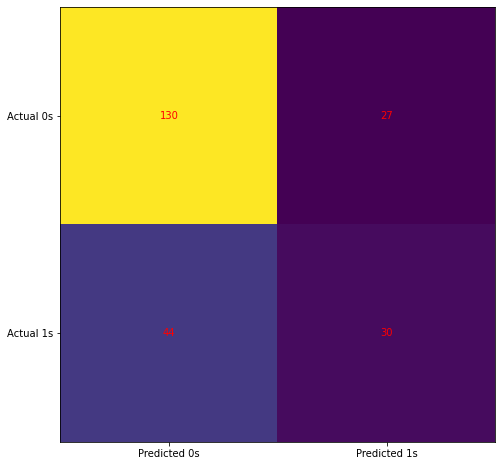

In [ ]:
# Creating multiple subplots to check the actual and the predicted value of the binary outcome

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
sgd.score(X_test, y_test)

0.6926406926406926

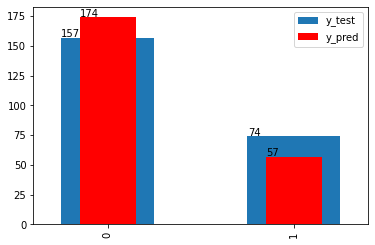

In [ ]:
# Creating multiple BAR Plots to check the actual and the predicted value of the binary outcome

df = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
fig, ax = plt.subplots()
df.y_test.value_counts().plot(kind='bar', ax=ax)
df.y_pred.value_counts().plot(kind='bar', width=0.3, color='r', ax=ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.legend()
plt.show()

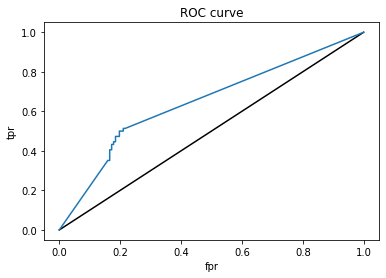

In [ ]:
#  The ROC curve is created by plotting the FPR (false positive rate) vs the TPR (true positive rate) 
#  at various thresholds settings

from sklearn.metrics import roc_curve
y_pred_proba = sgd.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k-')
plt.plot(fpr,tpr, label='SGD')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
#Checking roc_auc_score for y_test and y_pred. It provides area under the curve

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.616715441556206

In [ ]:
#Checking roc_auc_score for y_test and y_pred_proba. It provides area under the curve

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.6469271819590292